In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yaml
import requests
from io import StringIO
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math
# !pip install pandas sas7bdat
import pandas as pd
from sas7bdat import SAS7BDAT

In [3]:
# Path to your .sas7bdat file
sas_file_path = 'oral_health_pumf_cycle1.sas7bdat'

# Path where the .csv file will be saved
csv_file_path = 'oral_health_pumf_cycle1.csv'

# Read the SAS file
with SAS7BDAT(sas_file_path) as file:
    df = file.to_data_frame()

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'File saved as {csv_file_path}')

File saved as oral_health_pumf_cycle1.csv


In [57]:
testdf = pd.read_csv('oral_health_pumf_cycle1.csv')

In [6]:
testdf

,PUMFID,DHH_SEX,AGEGROUP,DHHGMS,WORK,EDUDH04,INCDDIA4,SDCFIMM,SDCFCB,RACE,...,OHQ_12L,OHQ_21,OHQ_22,OHQ_23,OHQ_24,OHQ_25,OHQ_26,OHQ_27,OHQ_28,WGT_FULL
0,47000000.0,2.0,1.0,3.0,6.0,9.0,4.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,759.257024
1,47000001.0,2.0,1.0,3.0,6.0,4.0,3.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7287.819719
2,47000002.0,2.0,5.0,3.0,1.0,4.0,3.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2799.467030
3,47000003.0,1.0,5.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,685.590528
4,47000004.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,671.006305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,47005599.0,1.0,7.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6091.723978
5600,47005600.0,1.0,5.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,...,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,18314.955345
5601,47005601.0,2.0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,4806.805193
5602,47005602.0,1.0,7.0,2.0,1.0,4.0,3.0,1.0,2.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1336.891937


In [58]:
with SAS7BDAT('oral_health_pumf_cycle1.sas7bdat') as f:
    rawdt = f.to_data_frame()

In [59]:
rawdt

,PUMFID,DHH_SEX,AGEGROUP,DHHGMS,WORK,EDUDH04,INCDDIA4,SDCFIMM,SDCFCB,RACE,...,OHQ_12L,OHQ_21,OHQ_22,OHQ_23,OHQ_24,OHQ_25,OHQ_26,OHQ_27,OHQ_28,WGT_FULL
0,47000000.0,2.0,1.0,3.0,6.0,9.0,4.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,759.257024
1,47000001.0,2.0,1.0,3.0,6.0,4.0,3.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7287.819719
2,47000002.0,2.0,5.0,3.0,1.0,4.0,3.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2799.467030
3,47000003.0,1.0,5.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,685.590528
4,47000004.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,671.006305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,47005599.0,1.0,7.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6091.723978
5600,47005600.0,1.0,5.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,...,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,18314.955345
5601,47005601.0,2.0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,4806.805193
5602,47005602.0,1.0,7.0,2.0,1.0,4.0,3.0,1.0,2.0,1.0,...,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1336.891937


In [3]:
df = rawdt[['DHH_SEX', 'AGEGROUP', 'WORK', 'INCDDIA4', 'RACE', 'SMKDGSTY', 'OHM_33',
            'OHM_41', 'OHM_43', 'OHE_61', 'OHE_63', 'OHE_64', 'OHE_65', 'OHQ_21']].copy()
df

,DHH_SEX,AGEGROUP,WORK,INCDDIA4,RACE,SMKDGSTY,OHM_33,OHM_41,OHM_43,OHE_61,OHE_63,OHE_64,OHE_65,OHQ_21
0,2.0,1.0,6.0,4.0,1.0,9.0,1.0,2.0,1.0,6.0,6.0,6.0,6.0,2.0
1,2.0,1.0,6.0,3.0,1.0,9.0,2.0,1.0,1.0,6.0,6.0,6.0,6.0,2.0
2,2.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,1.0
3,1.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,6.0,2.0
4,1.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0,6.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,1.0,7.0,2.0,3.0,1.0,1.0,4.0,2.0,2.0,6.0,6.0,6.0,6.0,2.0
5600,1.0,5.0,1.0,4.0,1.0,1.0,3.0,2.0,1.0,2.0,6.0,6.0,6.0,2.0
5601,2.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,2.0,6.0,2.0
5602,1.0,7.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,6.0,6.0,6.0,6.0,2.0


In [6]:
# drop the unanswerd questions
# transform yes to 1, no to 0

df = df.loc[df['OHM_41']<=2] # avoidanc of dental visit
df['OHM_41'] = df['OHM_41'].replace(2, 0)

df = df.loc[df['OHM_33']<=5] # frequncy of dental visit
df['OHM_33'] = df['OHM_33'].replace({2: 1, 3: 0, 4: 0, 5:0})

df = df.loc[df['OHM_43']<=2] # having some dental insurance
df['OHM_43'] = df['OHM_43'].replace(2, 0)

df = df.loc[df['OHQ_21']<=2] # toothache or not
df['OHQ_21'] = df['OHQ_21'].replace(2, 0)

# create a new column of number counting number of urgent treatment needed from 0-4
# urgent - OHE_61, 63, 64, 65,
df = df.loc[df['OHE_61']<=6]
df['OHE_61'] = df['OHE_61'].replace({2: 0, 6: 0})
df = df.loc[df['OHE_63']<=6]
df['OHE_63'] = df['OHE_63'].replace({2: 0, 6: 0})
df = df.loc[df['OHE_64']<=6]
df['OHE_64'] = df['OHE_64'].replace({2: 0, 6: 0})
df = df.loc[df['OHE_65']<=6]
df['OHE_65'] = df['OHE_65'].replace({2: 0, 6: 0})

C:\Users\amyc0\AppData\Local\Temp\ipykernel_38004\1638191974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OHM_41'] = df['OHM_41'].replace(2, 0)


In [6]:
df['num_urgent'] = df[['OHE_61', 'OHE_63', 'OHE_64', 'OHE_65']].apply(lambda row: (row == 1).sum(), axis=1)
# only 71 people need urgent treatment
# by OHQ_21, 532 people are suffering from toothache

In [7]:
df['OHM_33'].value_counts()

1.0    4288
0.0    1260
Name: OHM_33, dtype: int64

In [40]:
df['OHQ_21'].describe()

count    5548.000000
mean        0.095890
std         0.294467
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: OHQ_21, dtype: float64

In [44]:
df['num_urgent'].describe()

count    5548.000000
mean        0.017664
std         0.172087
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: num_urgent, dtype: float64

In [16]:
# Figure 1: percentage difference of visit at once a year - avoidance

# step 1: For groups with and wihout insurance calculate the two percentages.
some_insurance = df.groupby('OHM_43').get_group(1)
no_insurance = df.groupby('OHM_43').get_group(0)

    # calculate the percentage for at least one visit per year
ins_visit = some_insurance['OHM_33'].mean()
noins_visit = no_insurance['OHM_33'].mean()

    # precentage for avoidance
ins_avoid = some_insurance['OHM_41'].mean()
noins_avoid = no_insurance['OHM_41'].mean()

    # percentage for those who don't have a regular check up
ins_irr = 1 - ins_visit - ins_avoid
noins_irr = 1 - noins_visit - noins_avoid

# step 2: subtraction: % visit - % avoid
ins_diff = (ins_visit - ins_avoid) * 100
noins_diff = (noins_visit - noins_avoid) * 100


# step 3: Calculate the proportional increase
ins_prop = (ins_visit - ins_avoid)/ins_avoid * 100
noins_prop = (noins_visit - noins_avoid)/noins_avoid * 100




In [72]:
values = [ins_diff, noins_diff]
categories = ['Some Insurance Coverage', 'No Insurance Coverage']

plt.figure(figsize=(6, 5))
bars = plt.bar(categories, values, color=['skyblue', 'salmon'])

plt.title('Figure 1. Differences in Regular vs. Avoided Dental Visits by Insurance Status', fontsize=14)
plt.xlabel('Insurance Status', fontsize=12)
plt.ylabel('Percentage Point', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}%", ha='center', va='bottom')

plt.savefig('A2_fig1.png', bbox_inches='tight')
plt.show()

# am I alllowed to have a simple table listing the results to complement the 

NameError: name 'ins_diff' is not defined

In [12]:
ins_visit

0.8503581851950119

In [13]:
noins_visit

0.6087689713322091

In [14]:
noins_avoid

0.3254637436762226

In [15]:
ins_avoid

0.07773945343592464

In [18]:
noins_irr

0.06576728499156831

In [19]:
ins_irr

0.07190236136906342

In [36]:
table = {
    'Some Insuranece': [f"{round(ins_visit*100)}%", f"{round(ins_irr*100)}%", f"{round(ins_avoid*100)}%"],
    'No Insurance': [f"{round(noins_visit*100)}%", f"{round(noins_irr*100)}%", f"{math.floor(noins_avoid*100)}%"]
}

table1 = pd.DataFrame(table)
new_index = ['Regular Check-ups', 'Irregular Check-ups', 'Avoid Check-ups']
table1.index = new_index

table1

,Some Insuranece,No Insurance
Regular Check-ups,85%,61%
Irregular Check-ups,7%,7%
Avoid Check-ups,8%,32%


# Figure 2 and Table 2

In [ ]:
# 1. from the - insurade - visit and avoid, calculate the toothache rate 2
#    from the - uninsured - visit and avoid, calculate the toothache rate 2

# 1. group by - visit - toothache rate
#             - acoid - toothache rate
# 2. group by 

In [ ]:
# similar table as Table 1.1 but examine the toothache rate instead

In [23]:
# has inruance and visit/avoid toothache rate
insvisit_tche = some_insurance.groupby(['OHM_33']).get_group(1)['OHQ_21'].mean()
insavoid_tche = some_insurance.groupby(['OHM_33']).get_group(0)['OHQ_21'].mean()

# no insurance and visi/avoid toothache rate
noinsvisit_tche = no_insurance.groupby(['OHM_33']).get_group(1)['OHQ_21'].mean()
noinsavoid_tche = no_insurance.groupby(['OHM_33']).get_group(0)['OHQ_21'].mean()


In [31]:
# calculate the change in proportion:
# for some insurance: 
rt1 = (11-8)/8*100

# for no insurance:
rt2 = (12-9)/9*100

rt2

33.33333333333333

In [226]:
tb2 = {
    'Some Insuranece': [f"{round(insvisit_tche*100, 1)}%", f"{round(insavoid_tche*100, 1)}%"],
    'No Insurance': [f"{round(noinsvisit_tche*100, 1)}%", f"{round(noinsavoid_tche*100, 1)}%"]
}

table2 = pd.DataFrame(tb2)
new_index = ['Visit Regularly', 'Avoid to Visit']
table2.index = new_index

table2.T

,Visit Regularly,Avoid to Visit
Some Insuranece,8.6%,11.7%
No Insurance,9.7%,12.1%


In [241]:
(insavoid_tche - noinsavoid_tche)/noinsavoid_tche

-0.030395136778115523

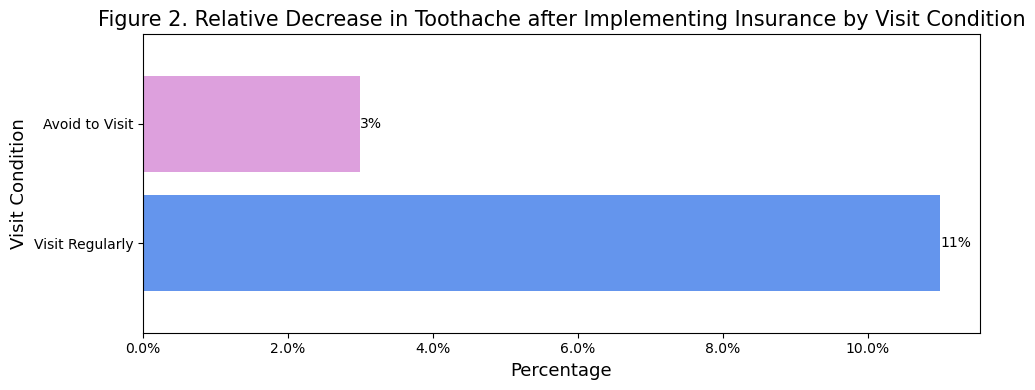

In [240]:
# calculate the relative decrease
v_tchert = -round((insvisit_tche - noinsvisit_tche)/noinsvisit_tche, 2) *100
a_tchert = -round((insavoid_tche - noinsavoid_tche)/noinsavoid_tche, 2) *100

values = [v_tchert, a_tchert]
categories = ['Visit Regularly', 'Avoid to Visit']

plt.figure(figsize=(10, 4))  # Landscape figure size

bars = plt.barh(categories, values, color=['cornflowerblue', 'plum'], height=0.8)
plt.ylim(-0.75, len(categories)-0.25)

plt.title('Figure 2. Relative Decrease in Toothache after Implementing Insurance by Visit Condition', fontsize=15)
plt.ylabel('Visit Condition', fontsize=13)
plt.xlabel('Percentage', fontsize=13)

# Add percentage text next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}%', 
             va='center', ha='left')


# Format the x-axis to show percentages
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [36]:
# idea 2: withou grouped by insruance status
#         for visit/avoid, calculate the toothache rate

visit_tche = df.groupby('OHM_33').get_group(1)['OHQ_21'].mean()
avoid_tche = df.groupby('OHM_33').get_group(0)['OHQ_21'].mean()

In [34]:
visit_tche

0.08908582089552239

In [37]:
avoid_tche

0.11904761904761904

In [38]:
# calculate the increase in proportion
(avoid_tche - visit_tche)/visit_tche *100

33.632510595861376

In [32]:
# idea 3: without group by visit/avoid
        # for insurance status, calculate the toothache rate
    
ins_tche = some_insurance['OHQ_21'].mean()
noins_tche = no_insurance['OHQ_21'].mean()

# Figure 3 and Table 3

In [147]:
# has inruance and visit/avoid
insvisit = some_insurance.groupby(['OHM_33']).get_group(1)
insavoid = some_insurance.groupby(['OHM_33']).get_group(0)

# no insurance and visi/avoid toothache rate
noinsvisit = no_insurance.groupby(['OHM_33']).get_group(1)
noinsavoid = no_insurance.groupby(['OHM_33']).get_group(0)

In [159]:
iv_urg = (insvisit['num_urgent'] != 0).mean()
niv_urg = (noinsvisit['num_urgent'] != 0).mean()

In [160]:
ia_urg = (insavoid['num_urgent'] != 0).mean()
nia_urg = (noinsavoid['num_urgent'] != 0).mean()

In [150]:
# since the outcome of toothache does not really depend on the insurance status
# considering using urgent surgeries instead

# has inruance and visit/avoid toothache rate
insvisit_urg = some_insurance.groupby(['OHM_33']).get_group(1)['num_urgent'].mean()
insavoid_urg = some_insurance.groupby(['OHM_33']).get_group(0)['num_urgent'].mean()

# no insurance and visi/avoid toothache rate
noinsvisit_urg = no_insurance.groupby(['OHM_33']).get_group(1)['num_urgent'].mean()
noinsavoid_urg = no_insurance.groupby(['OHM_33']).get_group(0)['num_urgent'].mean()


In [46]:
insavoid_urg

0.03546099290780142

In [132]:
insvisit_urg

0.012168486739469579

In [135]:
noinsvisit_urg

0.014773776546629732

In [48]:
noinsavoid_urg

0.033045977011494254

In [161]:
tb3 = {
    'Some Insuranece': [f"{round(iv_urg*100, 1)}%", f"{round(ia_urg*100, 1)}%"],
    'No Insurance': [f"{round(niv_urg*100, 1)}%", f"{round(nia_urg*100, 1)}%"]
}

table3 = pd.DataFrame(tb3)
new_index = ['Visit Regularly', 'Avoid to Visit']
table3.index = new_index

table3.T

# interpretation：
# for those visit regularly, the it is interesting to observe that amongst those who visit dental regularly

,Visit Regularly,Avoid to Visit
Some Insuranece,0.8%,2.5%
No Insurance,1.3%,2.3%


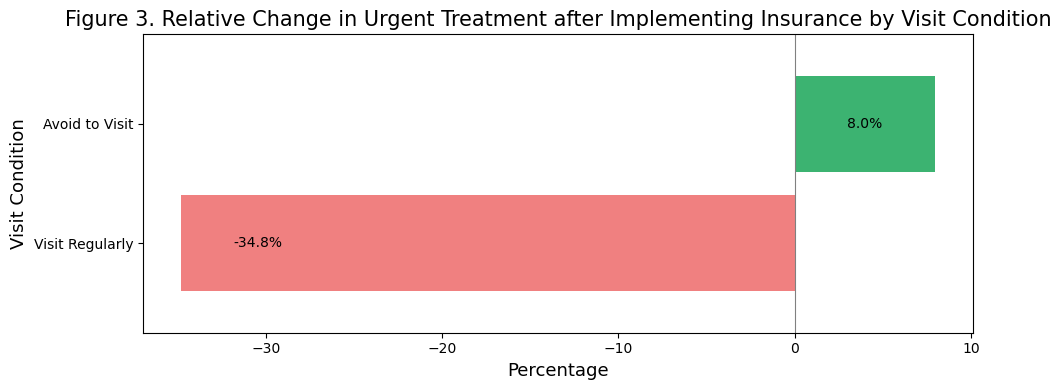

In [225]:
v_urgrt = (iv_urg - niv_urg)/niv_urg *100
a_urgrt = (ia_urg - nia_urg)/nia_urg *100

values = [v_urgrt, a_urgrt]
categories = ['Visit Regularly', 'Avoid to Visit']

# Set the colors for positive and negative values
colors = ['mediumseagreen' if x > 0 else 'lightcoral' for x in values]

plt.figure(figsize=(10, 4))  # Adjusted for a wider (landscape) graph
bars = plt.barh(categories, values, color=colors, height=0.8)
plt.ylim(-0.75, len(categories)-0.25)

plt.title('Figure 3. Relative Change in Urgent Treatment after Implementing Insurance by Visit Condition', fontsize=15)
plt.xlabel('Percentage', fontsize=13)
plt.ylabel('Visit Condition', fontsize=13)

# Center the x-axis at zero to clearly show positive and negative values
plt.axvline(0, color='gray', linewidth=0.8)

# Offset for the text inside the bar to prevent overlap
text_offset = 3

# Annotate the bars with the percentage value
for bar in bars:
    xval = bar.get_width()
    if xval >= 0:
        # For positive values, place the text inside the bar near the right edge
        plt.text(xval - text_offset, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", ha='right', va='center')
    else:
        # For negative values, place the text inside the bar near the left edge
        plt.text(xval + text_offset, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", ha='left', va='center')

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [53]:
# idea 2: without group by visit and avoid visit
    # for insurance status, calculate the urgent rate
    
ins_urg = some_insurance['num_urgent'].mean()
noins_urg = no_insurance['num_urgent'].mean()

In [55]:
ins_urg

0.015654019633855133

In [56]:
noins_urg

0.021922428330522766

In [57]:
# idea 3, without group by insurance status
    # for visit/avoid, calculate the urgent rate
    
visit_urg = df.groupby('OHM_33').get_group(1)['num_urgent'].mean()
avoid_urg = df.groupby('OHM_33').get_group(0)['num_urgent'].mean()

In [59]:
visit_urg

0.012826492537313433

In [58]:
avoid_urg

0.034126984126984124

In [80]:
insurg = (some_insurance['num_urgent'] != 0).mean()
noinsurg = (no_insurance['num_urgent'] != 0).mean()

In [81]:
insurg

0.010878217033695941

In [82]:
noinsurg

0.016863406408094434

In [83]:
vurg = (df.groupby(['OHM_33']).get_group(1)['num_urgent'] != 0).mean()
aurg = (df.groupby(['OHM_33']).get_group(0)['num_urgent'] != 0).mean()

In [84]:
vurg

0.009561567164179104

In [85]:
aurg

0.023809523809523808

In [94]:
df['num_urgent'].value_counts()

0    5477
1      50
2      16
3       4
4       1
Name: num_urgent, dtype: int64

In [129]:
df.groupby(['num_urgent']).get_group(4)['OHM_33'].mean()

1.0

# IV Experiment for toothache symptoms

In [60]:
ivdf = rawdt[['DHH_SEX', 'AGEGROUP', 'WORK', 'INCDDIA4', 'RACE', 'SMKDGSTY', 'OHM_33',
            'OHM_41', 'OHM_43', 'OHE_61', 'OHE_63', 'OHE_64', 'OHE_65', 'OHQ_21']].copy()
ivdf

,DHH_SEX,AGEGROUP,WORK,INCDDIA4,RACE,SMKDGSTY,OHM_33,OHM_41,OHM_43,OHE_61,OHE_63,OHE_64,OHE_65,OHQ_21
0,2.0,1.0,6.0,4.0,1.0,9.0,1.0,2.0,1.0,6.0,6.0,6.0,6.0,2.0
1,2.0,1.0,6.0,3.0,1.0,9.0,2.0,1.0,1.0,6.0,6.0,6.0,6.0,2.0
2,2.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,1.0
3,1.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,6.0,2.0
4,1.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0,6.0,6.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,1.0,7.0,2.0,3.0,1.0,1.0,4.0,2.0,2.0,6.0,6.0,6.0,6.0,2.0
5600,1.0,5.0,1.0,4.0,1.0,1.0,3.0,2.0,1.0,2.0,6.0,6.0,6.0,2.0
5601,2.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,6.0,2.0,6.0,2.0
5602,1.0,7.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,6.0,6.0,6.0,6.0,2.0


In [61]:
# drop the unanswerd questions
# transform yes to 1, no to 0

ivdf = ivdf.loc[ivdf['OHM_41']<=2] # avoidanc of dental visit
ivdf['OHM_41'] = ivdf['OHM_41'].replace(2, 0)

ivdf = ivdf.loc[ivdf['OHM_33']<=5] # frequncy of dental visit
ivdf['OHM_33'] = ivdf['OHM_33'].replace({2: 1, 3: 0, 4: 0, 5:0})

ivdf = ivdf.loc[ivdf['OHM_43']<=2] # having some dental insurance
ivdf['OHM_43'] = ivdf['OHM_43'].replace(2, 0)

ivdf = ivdf.loc[ivdf['OHQ_21']<=2] # toothache or not
ivdf['OHQ_21'] = ivdf['OHQ_21'].replace(2, 0)

C:\Users\amyc0\AppData\Local\Temp\ipykernel_17968\481897765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivdf['OHM_41'] = ivdf['OHM_41'].replace(2, 0)


In [27]:
# create a new column of number counting number of urgent treatment needed from 0-4
# urgent - OHE_61, 63, 64, 65,
ivdf = ivdf.loc[ivdf['OHE_61']<=6]
ivdf['OHE_61'] = ivdf['OHE_61'].replace({2: 0, 6: 0})
ivdf = ivdf.loc[ivdf['OHE_63']<=6]
ivdf['OHE_63'] = ivdf['OHE_63'].replace({2: 0, 6: 0})
ivdf = ivdf.loc[ivdf['OHE_64']<=6]
ivdf['OHE_64'] = ivdf['OHE_64'].replace({2: 0, 6: 0})
ivdf = ivdf.loc[ivdf['OHE_65']<=6]
ivdf['OHE_65'] = ivdf['OHE_65'].replace({2: 0, 6: 0})

ivdf['num_urgent'] = ivdf[['OHE_61', 'OHE_63', 'OHE_64', 'OHE_65']].apply(lambda row: (row == 1).sum(), axis=1)

In [63]:
# rename the variables
ivdf.rename(columns={'OHQ_21': 'Toothache', 'OHM_43': 'Insured', 'OHM_33': 'visit',
                     'OHM_41': 'avoid', 'AGEGROUP': 'Age Group'}, inplace=True)

In [64]:
# create a new column of dental visit condition:
# 0 == avoid to visit
# 1 == regular annual visit
# 2 == irrgular visit due to other reasons

# condition for the visit (ohm_33) column and the avoidance (ohm_41) column
# setup: column1=visit, column2=avoid
ivdf['Dental Visit Behaviour'] = 0
ivdf.loc[(ivdf['visit'] == 1) & (ivdf['avoid'] == 0), 'Dental Visit Behaviour'] = 1
ivdf.loc[(ivdf['visit'] == 0) & (ivdf['avoid'] == 0), 'Dental Visit Behaviour'] = 2

In [65]:
ivdf = ivdf[ivdf['Dental Visit Behaviour'] != 2]
ivdf['Dental Visit Behaviour'].value_counts()

1    3888
0     876
Name: Dental Visit Behaviour, dtype: int64

First Stage Regression:
                              OLS Regression Results                              
Dep. Variable:     Dental Visit Behaviour   R-squared:                       0.147
Model:                                OLS   Adj. R-squared:                  0.146
Method:                     Least Squares   F-statistic:                     409.7
Date:                    Sat, 09 Dec 2023   Prob (F-statistic):          6.42e-165
Time:                            21:32:54   Log-Likelihood:                -1863.7
No. Observations:                    4764   AIC:                             3733.
Df Residuals:                        4761   BIC:                             3753.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

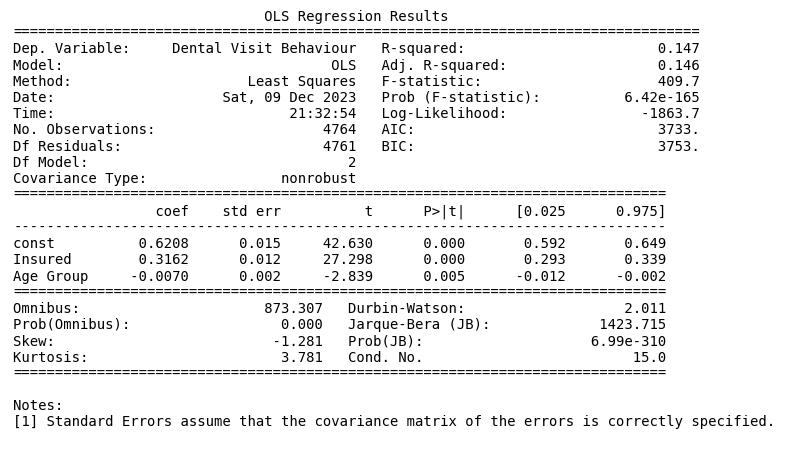

In [66]:
# First-stage regression
first_stage_model = sm.OLS(ivdf['Dental Visit Behaviour'], sm.add_constant(ivdf[['Insured', 'Age Group']])).fit()
print("First Stage Regression:")
print(first_stage_model.summary())

# Extract the predicted values from the first stage
ivdf['Dental Visit Condition'] = first_stage_model.predict()

# Load the image to extract the regression table text
img_path = 'results/image.png'

# Save the summary as text
plt.text(0.01, 0.05, str(first_stage_model.summary()), {'fontsize': 10}, fontproperties='monospace') 
# Setting the layout of the figure
plt.axis('off')
plt.tight_layout()

# Save the figure
plt.savefig('first_stage_model.png', bbox_inches='tight', pad_inches=0.5)




Reduced Form Regression:
                            OLS Regression Results                            
Dep. Variable:              Toothache   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.59
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.59e-05
Time:                        21:33:36   Log-Likelihood:                -993.87
No. Observations:                4764   AIC:                             1994.
Df Residuals:                    4761   BIC:                             2013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
co

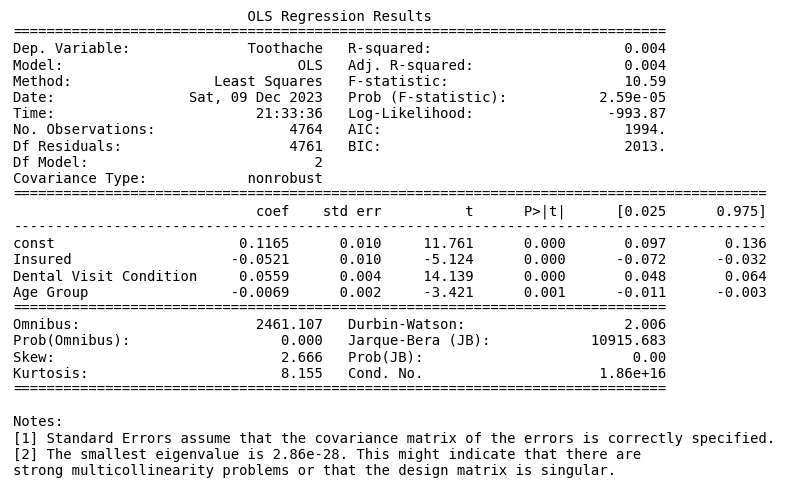

In [69]:
# Reduced Form Regression
rf_ache_model = sm.OLS(ivdf['Toothache'], sm.add_constant(ivdf[['Insured', 'Dental Visit Condition', 'Age Group']])).fit()
print("\nReduced Form Regression:")
print(rf_ache_model.summary())

# Load the image to extract the regression table text
img_path = 'results/image.png'

# Save the summary as text
plt.text(0.01, 0.05, str(rf_ache_model.summary()), {'fontsize': 10}, fontproperties='monospace')  
# Setting the layout of the figure
plt.axis('off')
plt.tight_layout()

# Save the figure
plt.savefig('reduced_form_model.png', bbox_inches='tight', pad_inches=0.5)



In [34]:
# Coefficient of insurance status from the reduced form regression
coeff_insurance_tache_rf = rf_ache_model.params['Insured']

# Coefficient of insurance status from the first stage regression
coeff_insurance_fs = first_stage_model.params['Insured']

# IV estimate
iv_estimate_tache = coeff_insurance_tache_rf / coeff_insurance_fs
iv_estimate_tache

-0.161676332517169

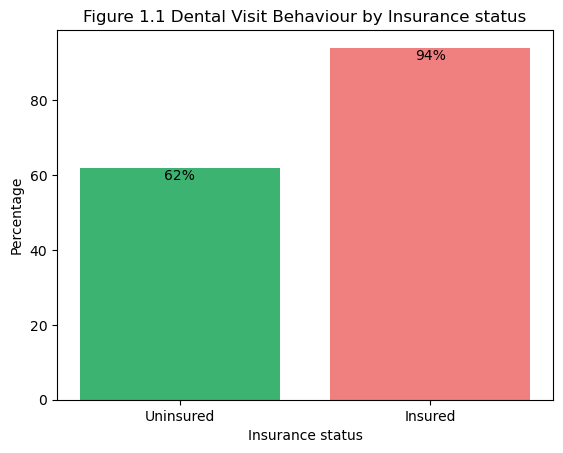

In [80]:
# bar plot of First-stage regression

const1 = first_stage_model.params['const']

categories = ['Uninsured', 'Insured']
values = [round(const1*100), round((const1 + coeff_insurance_fs)*100)]

colors = ['mediumseagreen', 'lightcoral']

plt.bar(categories, values, color=colors)

offset = 0.3
for i, v in enumerate(values):
    plt.text(i, v - offset, f'{v}%', ha='center', va='top', fontsize=10)

plt.xlabel('Insurance status')
plt.ylabel('Percentage')
plt.title('Figure 1.1 Dental Visit Behaviour by Insurance status')

plt.savefig('figure_1.1.png')
plt.show()

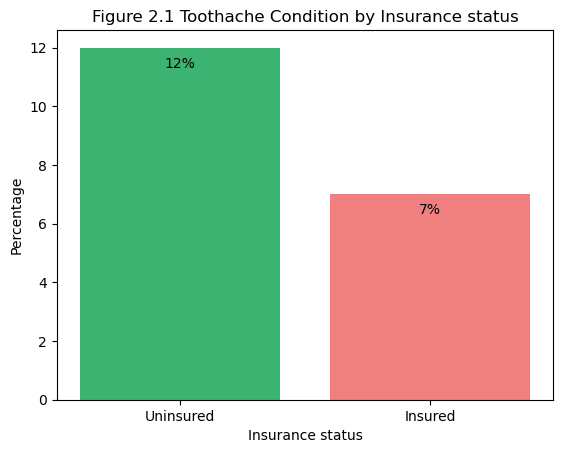

In [79]:
# bar plot of the reduced form regression

const2 = rf_ache_model.params['const']

categories = ['Uninsured', 'Insured']
values = [round(const2*100), round((const2 + coeff_insurance_tache_rf)*100)]

colors = ['mediumseagreen', 'lightcoral']

plt.bar(categories, values, color=colors)

offset = 0.3
for i, v in enumerate(values):
    plt.text(i, v - offset, f'{v}%', ha='center', va='top', fontsize=10)

plt.xlabel('Insurance status')
plt.ylabel('Percentage')
plt.title('Figure 2.1 Toothache Condition by Insurance status')

plt.savefig('figure_2.1.png')
plt.show()

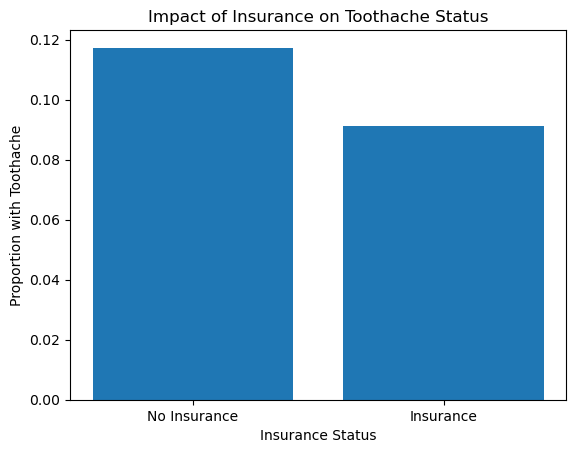

In [141]:
proportions = ivdf.groupby('insured')['toothache'].mean()

# Create a bar plot or dot plot
plt.bar(proportions.index, proportions.values)
plt.xlabel('Insurance Status')
plt.ylabel('Proportion with Toothache')
plt.xticks(proportions.index, ['No Insurance', 'Insurance'])
plt.title('Impact of Insurance on Toothache Status')
plt.show()

# IV experiment on Urgent dental treatment

In [132]:
# run the iv experiment on people with any 
ivdf['urgent'] = ivdf['num_urgent'].apply(lambda x: 1 if x != 0 else 0)

In [139]:
# Reduced Form Regression
rf_model_urg = sm.OLS(ivdf['urgent'], sm.add_constant(ivdf[['insured', 'PredictedDentalVisit', 'AGEGROUP']])).fit()
print("\nReduced Form Regression:")
print(rf_model_urg.summary())


Reduced Form Regression:
                            OLS Regression Results                            
Dep. Variable:                 urgent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.546
Date:                Thu, 07 Dec 2023   Prob (F-statistic):             0.0785
Time:                        18:21:56   Log-Likelihood:                 3969.0
No. Observations:                4752   AIC:                            -7932.
Df Residuals:                    4749   BIC:                            -7913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const 

In [140]:
# Coefficient of insurance status from the reduced form regression
coeff_insurance_urg2_rf = rf_model_urg.params['insured']

# Coefficient of insurance status from the first stage regression
coeff_insurance_fs = first_stage_model.params['insured']

# IV estimate
iv_estimate_urg = coeff_insurance_urg2_rf / coeff_insurance_fs
iv_estimate_urg

-0.029350577382257066